# Benjamin Graham and Warren Buffett Model Stock Exchange

## Introduction:
* There are about 4000 stocks which are actively traded on the stock exchanges at BSE and NSE.
* We can extract public financial data from sites like to find which are the fundamentally strong stocks. 
* On what stocks would the father of value investing, Benjamin Graham and Warren Buffett the most successful investors in the world make their investments on.

## Benjamin Graham and Warren Buffett Model:
1. **Step 1:** Filtering out all companies with sales less than Rs 250 cr. Companies with sales lower than this are very small companies and might not have the business stability and access to finance that is required for a safe investment. This eliminates the basic business risk.
2. **Step 2:** Filtering out all companies with debt to equity greater than 30%. Companies with low leverage are safer.
3. **Step 3:** Filtering out all companies with interest coverage ratio of less than 4. Companies with high interest coverage ratio have a highly reduced bankruptcy risk.
4. **Step 4:** Filtering out all companies with ROE less than 15% since they are earning less than their cost of capital. High ROE companies have a robust business model, which generates increased earnings for the company typically.
5. **Step 5:** Filtering out all companies with PE ratio greater than 25 since they are too expensive even for a high-quality company. This enables us to pick companies which are relatively cheaper as against their actual value. He points out that applying these filters enables us to reduce and even eliminate a lot of fundamental risks while ensuring a robust business model, strong earning potential and a good buying price.

## Implementation of the Model.

In [1]:
# importing required libraries

import requests
import re
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

In [2]:
# Read the data from the csv files

data=pd.read_csv("Companies.csv")
data.head()

,Company,Link
0,ADANIPORTS,https://www.moneycontrol.com/financials/adanip...
1,ASIANPAINT,https://www.moneycontrol.com/financials/asianp...
2,BAJAJ-AUTO,https://www.moneycontrol.com/financials/bajaja...
3,BAJFINANCE,https://www.moneycontrol.com/financials/bajajf...
4,BHARTIARTL,https://www.moneycontrol.com/financials/bharti...


### Analysing the dataset / Data cleaning.

In [3]:
# Checking for null values

data.isnull().sum()

Company    0
Link       0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Company  41 non-null     object
 1   Link     41 non-null     object
dtypes: object(2)
memory usage: 784.0+ bytes


In [5]:
data.describe()

,Company,Link
count,41,41
unique,41,41
top,TECHM,https://www.moneycontrol.com/financials/bharti...
freq,1,1


* The data looks clean and ready to be used.

### Extracting the links of the companies from the data.

**Note:** The data is being extracted from [Money Control Website](https://www.moneycontrol.com/)

In [6]:
companynames=list(data.iloc[:,0])
links=list(data.iloc[:,1])

#links for old format page
linkso=[]
for i in range(0,len(links)):
    a=links[i].find('VI')
    b=links[i][:a]+links[i][a+2:]
    linkso.append(b)

#links for profit-loss page
linkso_pl=[]
for i in range(0,len(linkso)):
    a=linkso[i].find('balance-sheet')
    b=linkso[i][:a]+'profit-loss'+linkso[i][a+13:]
    linkso_pl.append(b)

## Implementation of Step - 1 :
**Filtering out all companies with sales less than Rs 250 cr.**

### Scrapping Net Sales
<br>

**Note:** 
* As the details of net sales was not provided, the following banks were excluded from the file:
> HDFC bank, ICICI bank, Indusland bank, Kotak Mahindra Bank, Yes Bank, SBI
* As interestt cover ratio was not provided, the following were also excluded.
> Bajaj Finserv and Infosys 


In [7]:
netsales_list=[]
for i in range(0,len(linkso_pl)):
    pageold=requests.get(linkso_pl[i])
    soup = BeautifulSoup(pageold.text, 'html.parser')
    about=soup.findAll('table')
    about=str(about)
    a=re.findall('<td>Net Sales</td>\n.*</td>',about)
    netsales=re.findall('>[-+]?[0-9].*<',str(a))
    netsales=netsales[0][1:len(netsales[0])-1]
    if(netsales.find(',') != -1):
        b=netsales.find(',')
        netsales_list.append(float(netsales[:b]+netsales[b+1:]))
        b=-1
    else:
        netsales_list.append(float(netsales))

* The Net Sales of each company is saved in the netsales list in Crores.

In [8]:
# values in cr.
netsales_list

[4643.28,
 17194.09,
 29918.65,
 23822.53,
 54317.1,
 284382.95,
 10986.68,
 12659.15,
 845.16,
 11850.4,
 9077.47,
 71870.96,
 18609.4,
 32606.0,
 58738.92,
 28836.09,
 40242.0,
 38785.0,
 15407.35,
 6738.3,
 486256.45,
 45619.7,
 64262.0,
 82383.65,
 45487.78,
 75610.6,
 97700.39,
 109609.42,
 36185.54,
 335978.0,
 12531.93,
 43928.17,
 60435.97,
 131306.0,
 29225.4,
 20009.64,
 40649.17,
 9641.0,
 35858.0,
 50407.0,
 6857.9]

#### Filtering. 
* The companies with less than 250 cr. Net Sales are to be filtered out/removed.

In [9]:
filtersales=[]
filtercomp=[]
filterlink=[]
filterolink=[]
for i in range(0,len(netsales_list)):
    if(netsales_list[i]<250.00):
        filtersales.append(netsales_list[i])
        filtercomp.append(companynames[i])
        filterlink.append(links[i])
        filterolink.append(linkso[i])
for i in range(0,len(filtersales)):
    netsales_list.remove(filtersales[i])
    companynames.remove(filtercomp[i])
    links.remove(filterlink[i])
    linkso.remove(filterolink[i])

## Implementatin of Step - 2 :
**Filtering out all companies with debt to equity greater than 30%.**

### Scraping debt equity Ratio

* **Some of the data to be extracted is in old page format.**
* **The links of the old page is stored in linkso_r list.**

In [10]:
#links for ratio page
linkso_r=[]
for i in range(0,len(linkso)):
    a=linkso[i].find('balance-sheet')
    b=linkso[i][:a]+'ratios'+linkso[i][a+13:]
    linkso_r.append(b)
    
debtequity_ratio=[]
for i in range(0,len(linkso_r)):
    pageold=requests.get(linkso_r[i])
    soup = BeautifulSoup(pageold.text, 'html.parser')
    about=soup.findAll('table')
    about=str(about)
    a=re.findall('<td>Debt Equity Ratio</td>\n.*</td>',about)
    der=re.findall('>[-+]?[0-9].*<',str(a))
    if(len(der)==0):
        der=0
    else:
        der=der[0][1:len(der[0])-1]
    debtequity_ratio.append(float(der))


In [11]:
debtequity_ratio

[1.38,
 0.0,
 0.0,
 3.28,
 0.81,
 1.32,
 0.28,
 0.0,
 0.0,
 0.07,
 0.0,
 0.12,
 0.13,
 0.0,
 4.86,
 0.0,
 0.51,
 0.0,
 5.57,
 0.17,
 1.2,
 0.0,
 1.2,
 0.49,
 0.09,
 0.0,
 1.41,
 0.11,
 2.15,
 0.54,
 0.24,
 1.14,
 0.51,
 0.0,
 0.0,
 0.09,
 0.47,
 0.12,
 0.46,
 0.11,
 0.1]

#### Companies with Debt Equity Ratio greater than 0.3 are filtered/removed.

In [12]:
filtersales=[]  
filterder=[]
filtercomp=[]
filterlink=[]
filterolink=[]
for i in range(0,len(debtequity_ratio)):
    if(debtequity_ratio[i]>0.3):
        filterder.append(debtequity_ratio[i])
        filtercomp.append(companynames[i])
        filterlink.append(links[i])
        filterolink.append(linkso[i])
        filtersales.append(netsales_list[i])
for i in range(0,len(filterder)):
    debtequity_ratio.remove(filterder[i])
    companynames.remove(filtercomp[i])
    links.remove(filterlink[i])
    linkso.remove(filterolink[i])
    netsales_list.remove(filtersales[i])


## Implementation of Step - 3 :
**Filtering out all companies with interest coverage ratio of less than 4.**
<br>
### Scraping Interest Coverage Ratio.

In [13]:
#links for ratio page
linkso_r=[]

for i in range(0,len(linkso)):
    a=linkso[i].find('balance-sheet')
    b=linkso[i][:a]+'ratios'+linkso[i][a+13:]
    linkso_r.append(b)

icr_list=[]

for i in range(0,len(linkso_r)): 
    pageold=requests.get(linkso_r[i])
    soup = BeautifulSoup(pageold.text, 'html.parser')
    about=soup.findAll('table')
    about=str(about)
    a=re.findall('<td>Interest Cover</td>\n.*</td>',about)
    #icr = re.findall("[^a-zA-Z:]([-+]?\d+[\.]?\d*)", str(a))
    icr=re.findall('>[-+]?[0-9].*<',str(a))
    icr=icr[0][1:len(icr[0])-1]
    if(icr.find(',') != -1):
        b=icr.find(',')
        icr_list.append(float(icr[:b]+icr[b+1:]))
        b=-1
    else:
        icr_list.append(float(icr))

In [14]:
icr_list

[44.97,
 2083.34,
 29.99,
 83.23,
 2149.15,
 59.07,
 224.79,
 73.27,
 6.55,
 47.96,
 177.94,
 88.63,
 -650.95,
 347.36,
 46.31,
 54.16,
 17.03,
 8.97,
 57.52,
 80.94,
 15.08,
 3.01,
 21.57,
 21.38]

#### Filtering out all companies with interest coverage ratio of less than 4.

In [15]:
filtericr=[]
filtercomp=[]
filterlink=[]
filterolink=[]
filtersales=[]
filterder=[]
for i in range(0,len(icr_list)):
    if(icr_list[i]<4):
        filtericr.append(icr_list[i])
        filtercomp.append(companynames[i])
        filterlink.append(links[i])
        filterolink.append(linkso[i])
        filtersales.append(netsales_list[i])
        filterder.append(debtequity_ratio[i])
for i in range(0,len(filtericr)):
    icr_list.remove(filtericr[i])
    companynames.remove(filtercomp[i])
    links.remove(filterlink[i])
    linkso.remove(filterolink[i])   
    netsales_list.remove(filtersales[i])
    debtequity_ratio.remove(filterder[i])

## Implementation of Step - 4 :
**Filtering out all companies with ROE less than 15%**

* ROE stands for **Return on Equity.**
* ROE is calculated by using the formula showm below.

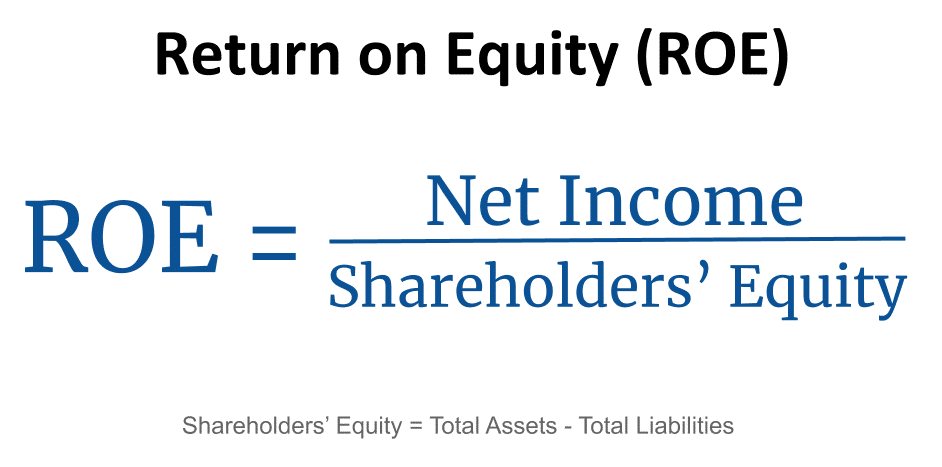

* Net Income can be scrapped directly from the website.

**Scraping Total Income**

In [16]:
# links for profit loss page is stored in links_pl
links_pl=[]
for i in range(0,len(links)):
    a=links[i].find('balance-sheet')
    b=links[i][:a]+'profit-loss'+links[i][a+13:]
    links_pl.append(b)

ti_list=[]
for i in range(0,len(links_pl)):
    pageold=requests.get(links_pl[i])
    soup = BeautifulSoup(pageold.text, 'html.parser')
    about=soup.findAll('table')
    about=str(about)
    a=re.findall('<td>Total Revenue</td>\n.*</td>',about)
    ti=re.findall('>[0-9].*<',str(a))
    ti=ti[0][1:len(ti[0])-1]
    if(ti.find(',') != -1):
        b=ti.find(',')
        ti_list.append(float(ti[:b]+ti[b+1:]))
        b = -1
    else:
        ti_list.append(float(ti))


* Total Net Income has been scrapped and stored in the ti_list variable.

In [17]:
ti_list

[17551.63,
 31652.21,
 11322.11,
 13552.0,
 12411.49,
 12593.6,
 9692.81,
 73287.8,
 19134.85,
 33193.0,
 29614.43,
 39518.0,
 48633.36,
 47155.59,
 79031.4,
 117128.43,
 14042.85,
 139388.0,
 31591.6,
 20156.05,
 52883.6,
 7047.3]

**Scraping Shareholder's Equity Share Capital**

* Total assests can be extracted directly from the website.
* Total Liabilities is **Total Non-Current Liabilities + Total Current Liabilities.**
* Total Non-Current Liabilities and Total Current Liabilities can be extracted from the website and later used in the formula.

In [20]:
tot_assets=[]
current_lia=[]
noncurrent_lia=[]

for i in range(0,len(links)):
    pageold=requests.get(links[i])
    soup = BeautifulSoup(pageold.text, 'html.parser')
    about=soup.findAll('table')
    about=str(about)
    
    ''' Scraping Total Assests'''
    
    a=re.findall('<td>Total Assets</td>\n.*</td>',about)
    totas=re.findall('>[-+]?[0-9].*<',str(a))
    totas=totas[0][1:len(totas[0])-1]
    if(totas.find(',') != -1):
        b=totas.find(',')
        tot_assets.append(float(totas[:b]+totas[b+1:]))
        b=-1
    else:
        tot_assets.append(float(totas))
    
    ''' Scrapping Total Non- Current Liabilities.'''
    
    a=re.findall('<td>Total Non-Current Liabilities</td>\n.*</td>',about)
    totncl=re.findall('>[-+]?[0-9].*<',str(a))
    totncl=totncl[0][1:len(totncl[0])-1]
    if(totncl.find(',') != -1):
        b=totncl.find(',')
        noncurrent_lia.append(float(totncl[:b]+totncl[b+1:]))
        b = -1
    else:
        noncurrent_lia.append(float(totncl))
        
    ''' Scrapping Total Current Liabilites. '''
    
    a=re.findall('<td>Total Current Liabilities</td>\n.*</td>',about)
    totcl=re.findall('>[-+]?[0-9].*<',str(a))
    totcl=totcl[0][1:len(totcl[0])-1]
    if(totcl.find(',') != -1):
        b=totcl.find(',')
        current_lia.append(float(totcl[:b]+totcl[b+1:]))
        b=-1
    else:
        current_lia.append(float(totcl))
    


* The Total Assets is stored in tot_assets variable.

In [21]:
tot_assets

[13587.62,
 24773.3,
 7253.34,
 20405.66,
 22416.78,
 19475.8,
 10579.01,
 68533.63,
 49494.57,
 53515.0,
 18749.33,
 19602.0,
 75235.36,
 50502.06,
 62552.1,
 302234.81,
 38410.33,
 104975.0,
 30322.0,
 13187.95,
 65306.4,
 10869.1]

* Total Non-Current Liabilities is stored in noncurrent_lia variable

In [22]:
noncurrent_lia

[939.28,
 594.6,
 763.63,
 383.41,
 4915.43,
 103.4,
 442.55,
 13124.96,
 4313.24,
 2278.0,
 636.87,
 2467.0,
 2116.79,
 5061.4,
 2820.3,
 52525.38,
 2810.37,
 6581.0,
 2334.8,
 1119.21,
 2408.9,
 126.6]

* Total Current Liabilities is stored in current_lia variable.

In [23]:
current_lia

[3195.05,
 4253.21,
 2215.06,
 2619.29,
 688.05,
 4180.5,
 1861.12,
 11437.57,
 7507.29,
 13941.0,
 3976.06,
 9104.0,
 9089.41,
 10972.82,
 11294.8,
 46716.88,
 11203.74,
 24026.0,
 5713.8,
 5243.88,
 16443.8,
 2870.2]

**Calculating ROE from the scrapped data.**

In [24]:
# calculating Shareholder's Equity

share_equity = np.array(tot_assets)-(np.array(current_lia) + np.array(noncurrent_lia))

In [25]:
roe_list = np.array(ti_list)/share_equity 
roe_list = roe_list.tolist()

In [27]:
# Values are in proportion.
roe_list

[1.8566689480593528,
 1.5885285631620605,
 2.648663633279918,
 0.7787181031272842,
 0.7381947624797036,
 0.828968068510193,
 1.1712884304451538,
 1.6667265544869243,
 0.5079054436423596,
 0.8899882024882025,
 2.0949060581194643,
 4.920682355871,
 0.7595501799492606,
 1.3681040065173797,
 1.6316328426616016,
 0.5770085158297681,
 0.5756158126135934,
 1.8743007745266782,
 1.4183555272208104,
 2.9533279803541754,
 1.138415239259736,
 0.8952021645516557]

### Filtering ROE values.

* Filtering companies having ROE value less than 15% (0.15).

In [28]:
filtersales=[]  
filterder=[]
filtericr=[]
filterroe=[]
filtercomp=[]
filterlink=[]
filterolink=[]
for i in range(0,len(roe_list)):
    if(roe_list[i]<0.15):
        filtersales.append(netsales_list[i])
        filterder.append(debtequity_ratio[i])
        filtericr.append(icr_list[i])
        filterroe.append(roe_list[i])
        filtercomp.append(companynames[i])
        filterlink.append(links[i])

for i in range(0,len(filterroe)):
    netsales_list.remove(filtersales[i])
    debtequity_ratio.remove(filterder[i])
    icr_list.remove(filtericr[i])
    roe_list.remove(filterroe[i])
    companynames.remove(filtercomp[i])
    links.remove(filterlink[i])

## Implementation of Step - 5 :
**Filtering out all companies with PE ratio greater than 25 since they are too expensive even for a high-quality company**

* PE stands for **Price per Earning Ratio.**
* PE can be calculated by using the formula shown below.

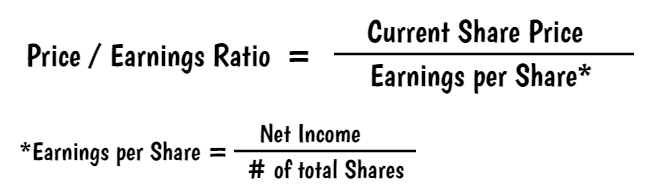

* Current Share price is not available directly from the website.
* It can be calculated using the formula **Price per book value * Book value per Share.**

### Scraping for Current Share Price.

In [29]:
# links for ratio

links_r=[]
for i in range(0,len(links)):
    a=links[i].find('balance-sheet')
    b=links[i][:a]+'ratios'+links[i][a+13:]
    links_r.append(b)

    
pricbv=[]
bkvshr=[]
for i in range(0,len(links_r)):
    pageold=requests.get(links_r[i])
    soup = BeautifulSoup(pageold.text, 'html.parser')
    about=soup.findAll('table')
    about=str(about)
    
    ''' Scraping for price/book-value. '''
    
    a=re.findall('<td>Price/BV.*</td>\n.*</td>',about)
    pbv=re.findall('>[-+]?[0-9].*<',str(a))
    pbv=pbv[0][1:len(pbv[0])-1]
    if(pbv.find(',') != -1):
        b=pbv.find(',')
        pricbv.append(float(pbv[:b]+pbv[b+1:]))
        b=-1
    else:
        pricbv.append(float(pbv))
        
    ''' Scraping for book-value/share. '''
    
    a=re.findall('<td>Book Value.*/Share.*</td>\n.*</td>',about)
    a=a[0]
    pbvs=re.findall('>[-+]?[0-9].*<',str(a))
    pbvs=pbvs[0][1:len(pbvs[0])-1]
    if(pbvs.find(',') != -1):
        b=pbvs.find(',')
        bkvshr.append(float(pbvs[:b]+pbvs[b+1:]))
        b=-1
    else:
        bkvshr.append(float(pbvs))



* Price per book value is stored in the pricbv variable.

In [30]:
pricbv

[16.91,
 2.94,
 15.13,
 1.96,
 5.13,
 3.41,
 4.32,
 0.78,
 0.83,
 3.18,
 2.25,
 61.81,
 3.3,
 0.99,
 2.67,
 0.99,
 3.46,
 9.19,
 2.45,
 12.14,
 2.42,
 5.98]

* Book-value per share is store in bkvshr variable.

In [31]:
bkvshr

[98.55,
 688.58,
 177.74,
 215.85,
 27.28,
 914.07,
 3031.26,
 97.49,
 572.68,
 137.37,
 707.7,
 37.18,
 52.09,
 288.91,
 1603.87,
 161.36,
 101.68,
 198.31,
 230.62,
 76.87,
 81.31,
 74.29]

### Scraping Earnings Per Share.

In [33]:
eps_list=[]
for i in range(0,len(links_pl)):
    pageold=requests.get(links_pl[i])
    soup = BeautifulSoup(pageold.text, 'html.parser')
    about=soup.findAll('table')
    about=str(about)
    a=re.findall('<td>Basic EPS.*</td>\n.*</td>',about)
    eps=re.findall('>[-+]?[0-9].*<',str(a))
    eps=eps[0][1:len(eps[0])-1]
    if(eps.find(',') != -1):
        b=eps.find(',')
        eps_list.append(float(eps[:b]+eps[b+1:]))
        b=-1
    else:
        eps_list.append(float(eps))

* Earnings per share is stored in eps_list variable.

In [34]:
eps_list

[27.67,
 176.3,
 61.75,
 28.76,
 18.31,
 177.23,
 697.5,
 14.68,
 19.35,
 33.06,
 181.91,
 31.13,
 12.33,
 11.16,
 187.06,
 20.86,
 13.38,
 88.64,
 46.89,
 17.09,
 14.88,
 17.23]

### Calculating Price to Equity Ratio (PE) as per the formula.

In [35]:
pe=np.array(bkvshr)*np.array(pricbv)/np.array(eps_list)
pe=pe.tolist()

* PE ratio values are store in pe variable.

In [36]:
pe

[60.226978677267795,
 11.48284288145207,
 43.549897975708504,
 14.71022253129346,
 7.643167667941017,
 17.587195734356488,
 18.77425548387097,
 5.179986376021798,
 24.56456847545219,
 13.213448275862069,
 8.753367049639932,
 73.8225441696113,
 13.941362530413624,
 25.62911290322581,
 22.892830642574573,
 7.658024928092043,
 26.2939312406577,
 20.56034408844765,
 12.049882704201321,
 54.605137507314225,
 13.22380376344086,
 25.783760882182243]

**Filtering out all companies with PE ratio greater than 25**

In [37]:
''' Filtering wrt PE values '''
filtersales=[]  
filterder=[]
filtericr=[]
filterroe=[]
filterpe=[]
filtercomp=[]
filterlink=[]
filterolink=[]
for i in range(0,len(pe)):
    if(pe[i]>25):
        filtersales.append(netsales_list[i])
        filterder.append(debtequity_ratio[i])
        filtericr.append(icr_list[i])
        filterroe.append(roe_list[i])
        filterpe.append(pe[i])
        filtercomp.append(companynames[i])
        filterlink.append(links[i])

for i in range(0,len(filterpe)):
    netsales_list.remove(filtersales[i])
    debtequity_ratio.remove(filterder[i])
    icr_list.remove(filtericr[i])
    roe_list.remove(filterroe[i])
    pe.remove(filterpe[i])
    companynames.remove(filtercomp[i])
    links.remove(filterlink[i])

## Results:
* The Benjamin Graham and Warren Buffer filter was implemented on the given companies to filter out the comapanies which are poor in the current stock market.

**The final list of companies that have passed the filter is made into a dataframe.**

In [38]:
final=list(zip(companynames,netsales_list,debtequity_ratio,icr_list,roe_list,pe))

filtered_list=pd.DataFrame(final,columns=['Company','Net Sales in cr.','Debt to Equity Ratio','Interest Coverage Ratio','Return On Equity (ROE)','P/E Ratio'])


In [39]:
print(filtered_list)

       Company  Net Sales in cr.  Debt to Equity Ratio  \
0   BAJAJ-AUTO          29918.65                  0.07   
1        CIPLA          12659.15                  0.00   
2    COALINDIA            845.16                  0.13   
3      DRREDDY          11850.40                  0.00   
4    EICHERMOT           9077.47                  0.00   
5         GAIL          71870.96                  0.00   
6       GRASIM          18609.40                  0.00   
7      HCLTECH          32606.00                  0.09   
8   HEROMOTOCO          28836.09                  0.00   
9          ITC          45619.70                  0.11   
10      MARUTI          75610.60                  0.24   
11        ONGC         109609.42                  0.00   
12         TCS         131306.00                  0.00   
13       TECHM          29225.40                  0.09   
14       WIPRO          50407.00                  0.11   

    Interest Coverage Ratio  Return On Equity (ROE)  P/E Ratio  
0     

* Storing these companies in an excel sheet.

In [40]:
filtered_list.to_csv('After_Filteration.csv', index=False)

## Note:
* These values and filteration process is dynamic.
* The data and values might change based on the company's performance in the stock market.